In [3]:
import mrcfile
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import transform

def load_particles(particle_dir="/Users/rr/Projects/wasserstein-k-means/raw_data/", filename='EMD-2984_0003.mrc'):
    with mrcfile.open(os.path.join(particle_dir, filename)) as mrc:
        micrograph = mrc.data
    box_file = filename.split(".")[0] + ".box"
    picked_particles = []
    with open(os.path.join(particle_dir, box_file), "r") as bf:
        boxes = bf.readlines()
        for box in boxes:
            coors = box.split()
            coors = [int(coor) for coor in coors]
            print(coors)

            picked_particles.append(micrograph[coors[0] : coors[0] + coors[2], coors[1] : coors[1] + coors[3]])
    scaled_particles = [transform.downscale_local_mean(particle, (15,15)) for particle in picked_particles]
    return scaled_particles

In [4]:
particles = load_particles()

[5323, 97, 1536, 1536]
[6051, 57, 1536, 1536]
[3181, 381, 1536, 1536]
[937, 826, 1536, 1536]
[1634, 1040, 1536, 1536]
[3247, 1078, 1536, 1536]
[3347, 2141, 1536, 1536]
[3047, 2316, 1536, 1536]
[1617, 2507, 1536, 1536]
[5718, 2644, 1536, 1536]
[887, 3729, 1536, 1536]
[4736, 3789, 1536, 1536]
[2035, 3783, 1536, 1536]
[384, 4010, 1536, 1536]
[1340, 3949, 1536, 1536]
[3812, 4308, 1536, 1536]
[4229, 4316, 1536, 1536]
[698, 5014, 1536, 1536]


[4005, 119, 1536, 1536]
[1236, 196, 1536, 1536]
[4625, 575, 1536, 1536]
[1543, 691, 1536, 1536]
[2927, 1300, 1536, 1536]
[227, 1636, 1536, 1536]
[3571, 1823, 1536, 1536]
[932, 2340, 1536, 1536]
[1839, 2537, 1536, 1536]
[3013, 3849, 1536, 1536]
[4091, 3834, 1536, 1536]
[1903, 4150, 1536, 1536]
[5260, 4358, 1536, 1536]
[4367, 4430, 1536, 1536]
[2592, 4599, 1536, 1536]
[3376, 4731, 1536, 1536]
[5461, 4776, 1536, 1536]
[873, 5291, 1536, 1536]
[4974, 5366, 1536, 1536]


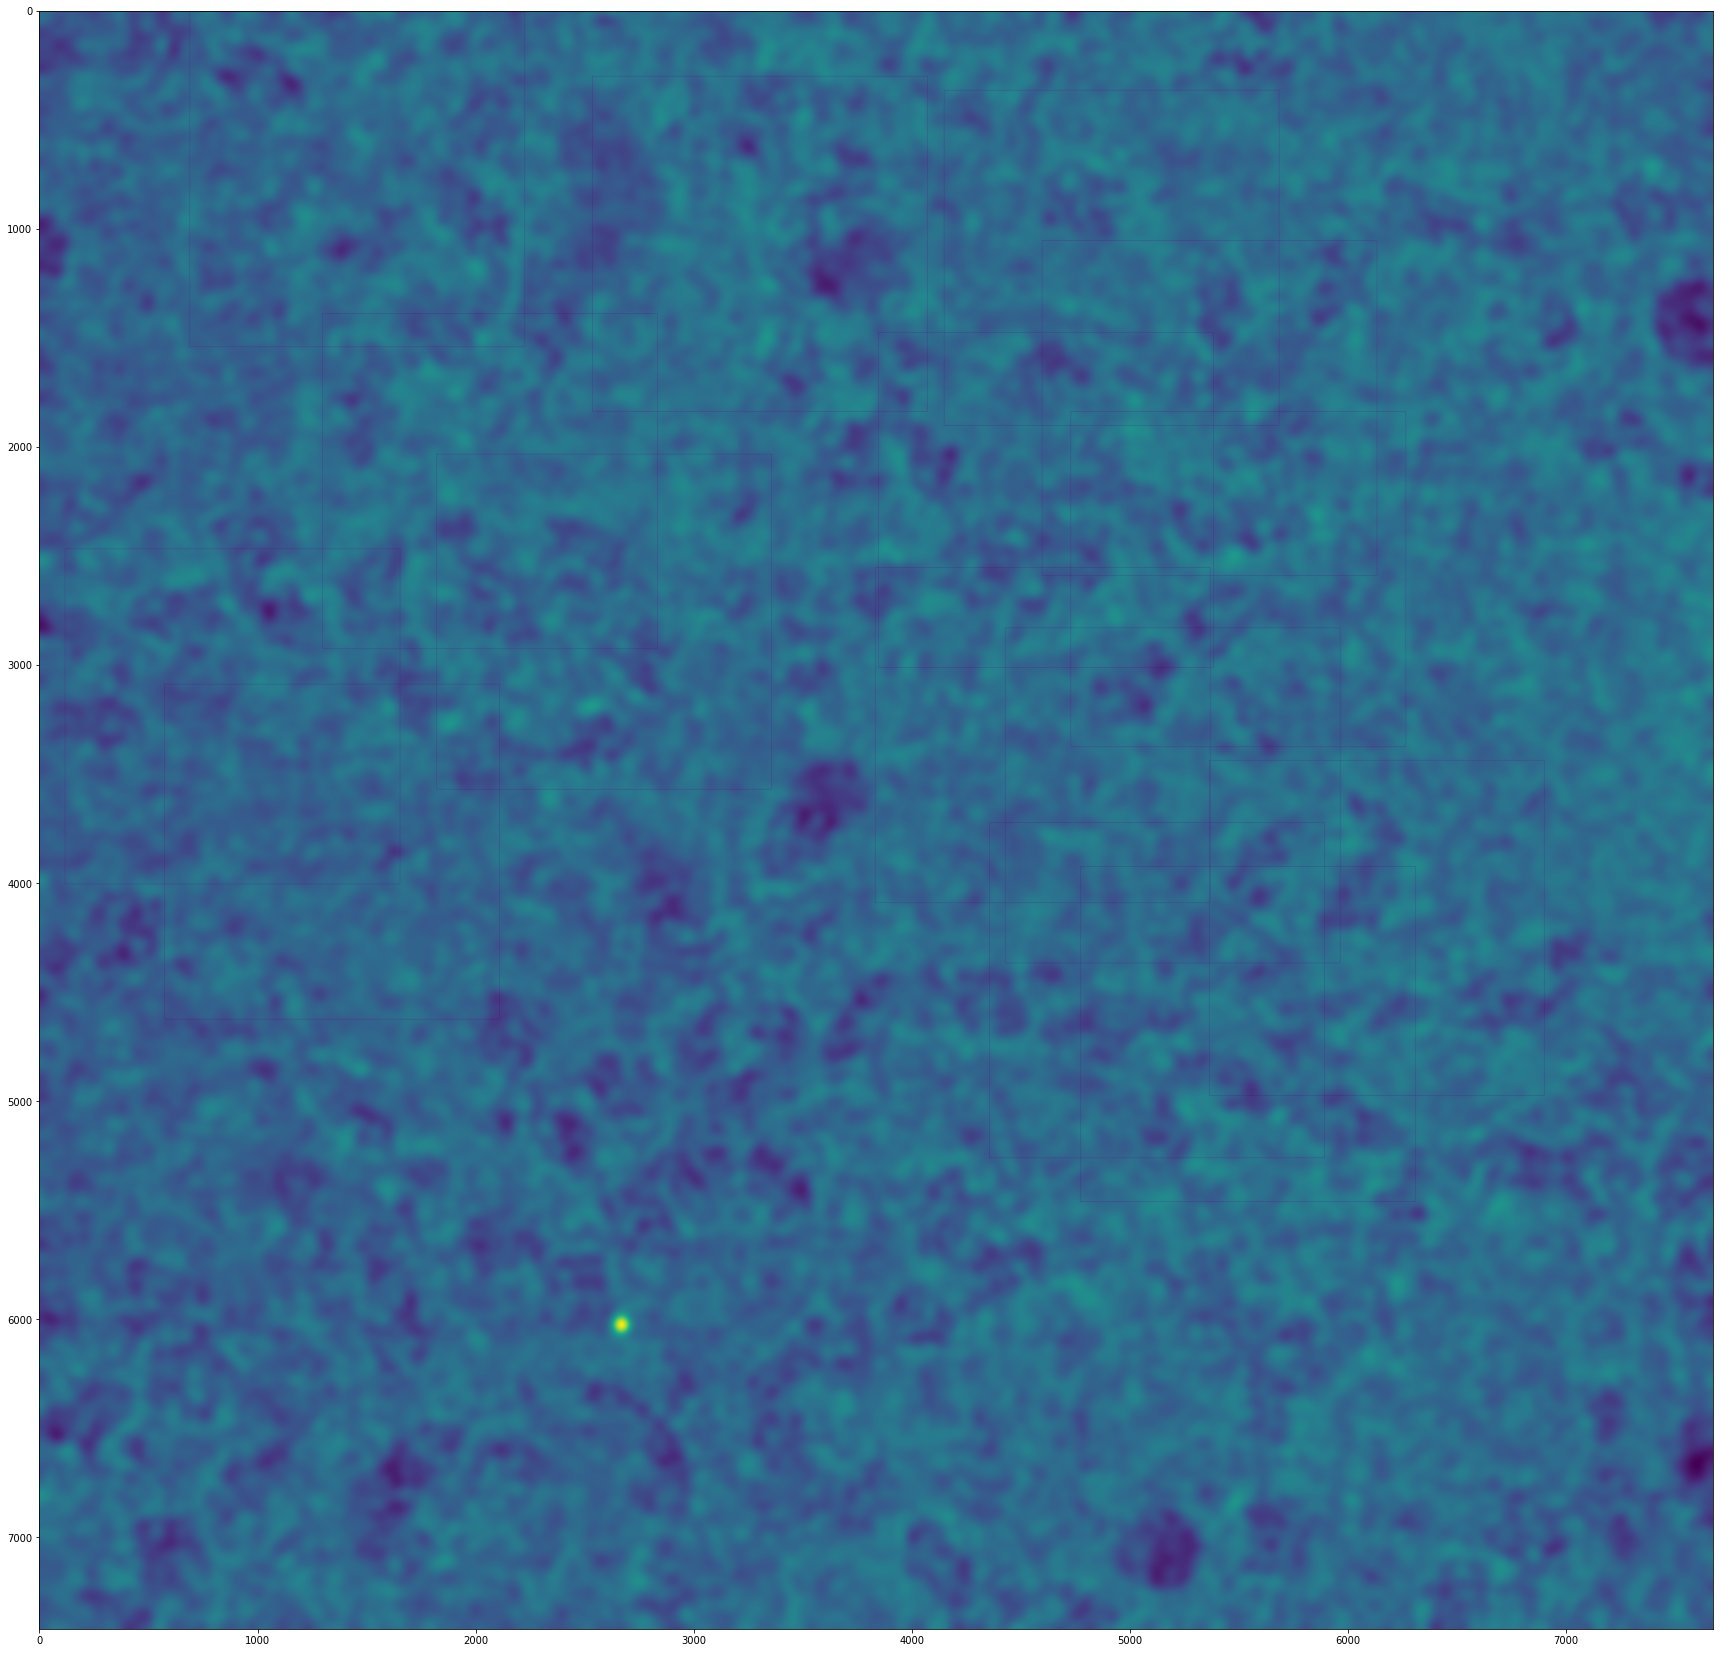

In [59]:
from scipy.ndimage import gaussian_filter
from skimage.util import montage


def mark_boxes(micro, box_file):
    boxes = []
    with open(box_file, "r") as bf:
        boxes_ = bf.readlines()
        for box in boxes_:
            coors = box.split()
            coors = [int(coor) for coor in coors]
            boxes.append(coors)
    marking_value = np.min(micro)
    for box in boxes:
        print(box)
        if box[1] + box[3] >= micro.shape[1] or box[0] - box[2] < 0:
            continue
        micro[box[0], box[1]:box[1] + box[3]] = marking_value
        micro[box[0] - box[2], box[1]:box[1] + box[3]] = marking_value
        micro[box[0]-box[2]:box[0] , box[1]] = marking_value
        micro[box[0]-box[2]:box[0] , box[1] + box[3]] = marking_value
    return micro

filename = "/Users/rr/Projects/wasserstein-k-means/raw_data/EMD-2984_0000.mrc"
box_file = filename.split(".")[0] + ".box"


with mrcfile.open(filename) as mrc:
    micrograph = gaussian_filter(mrc.data, 30)
    micrograph = mark_boxes(micrograph,  box_file)

fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(micrograph)

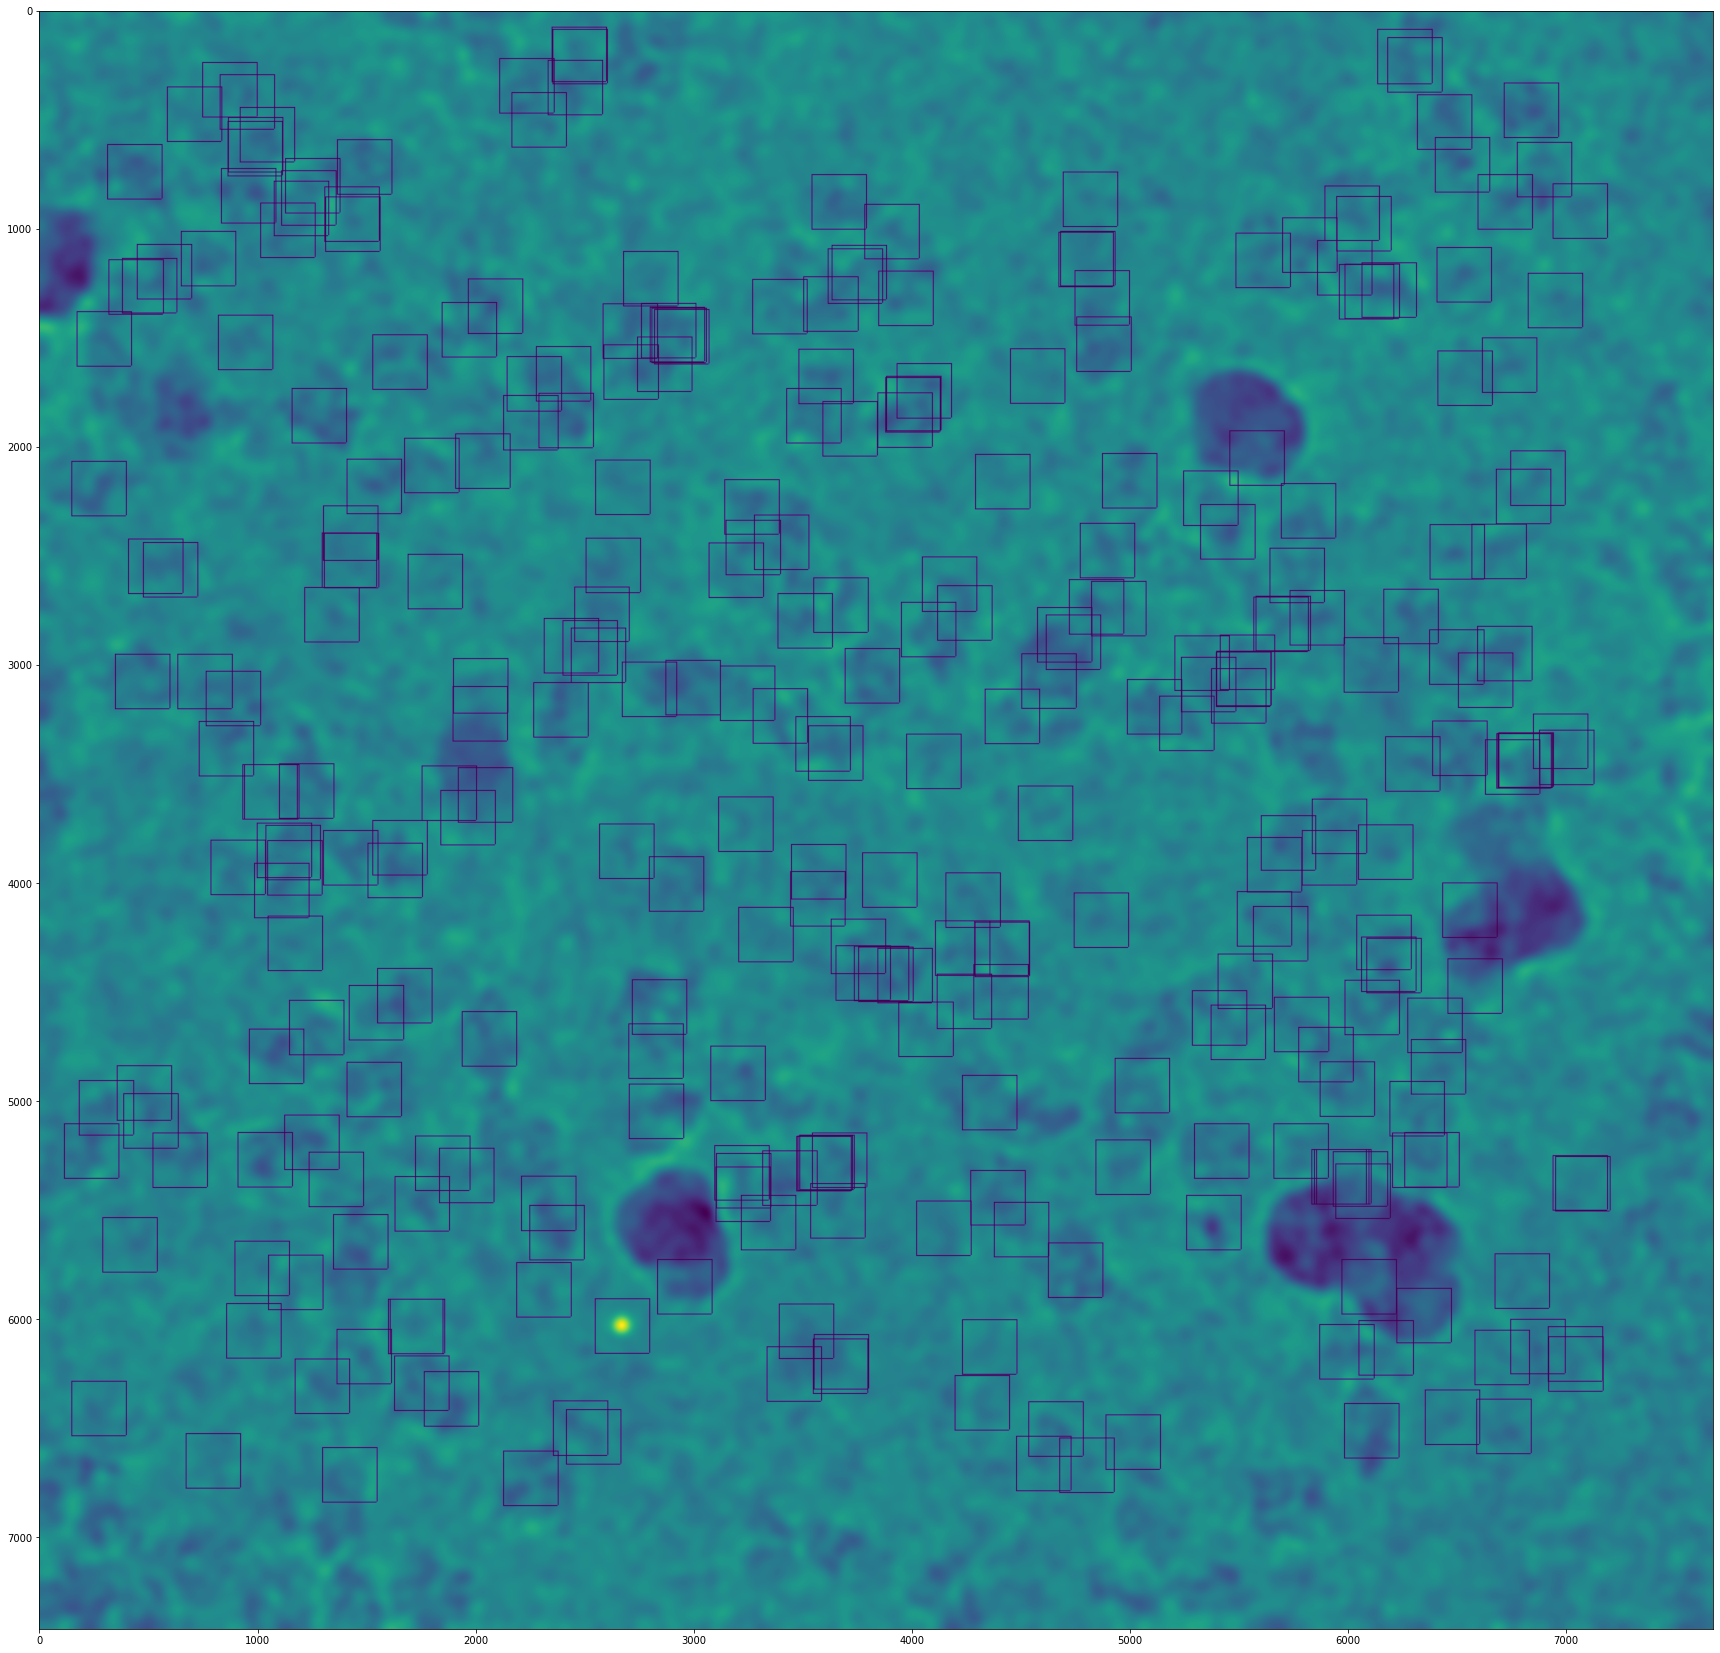

In [55]:
filename = "/Users/rr/Projects/wasserstein-k-means/star_dir/EMD-2984_0003_applepick.star"
centers = []
with open(filename) as f:
    lines = f.readlines()[5:]
    for line in lines:
        x, y = line.strip().split()
        x = int(x)
        y = int(y)
        centers.append([x, y])
centers = np.array(centers)
picks = micrograph
fill = micrograph.min()
for i in range(0, centers.shape[0]):
    y = int(centers[i, 1])
    x = int(centers[i, 0])
    d = int(np.floor(125))
    picks[y-d:y-d+5, x-d:x+d] = fill
    picks[y+d:y+d+5, x-d:x+d] = fill
    picks[y-d:y+d, x-d:x-d+5] = fill
    picks[y-d:y+d, x+d:x+d+5] = fill
fig, ax = plt.subplots(figsize=(30, 30))
ax.imshow(picks)

array([], dtype=float64)

In [72]:
particle_dir="/Users/rr/Projects/wasserstein-k-means/raw_data/ribosome/"
filename='030_particles_shiny_nb50_new.mrcs'
with mrcfile.open(os.path.join(particle_dir, filename)) as mrc:
    micrograph_stack = mrc.data

In [77]:
files = os.listdir("/Users/rr/Projects/wasserstein-k-means/raw_data/ribosome/")
data = []

for f in files:
    with mrcfile.open(os.path.join(particle_dir, f)) as mrc:
        micrograph_stack = mrc.data
        for micrograph in micrograph_stack:
            data.append(micrograph)

In [79]:
data = np.array(data)

In [82]:
np.save("raw_ribosome_data.npy", data)

In [83]:
import aspire

ModuleNotFoundError: No module named 'aspire'